In [ ]:
# Install torch-lr-finder
!pip install torch-lr-finder

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 2.85E-01


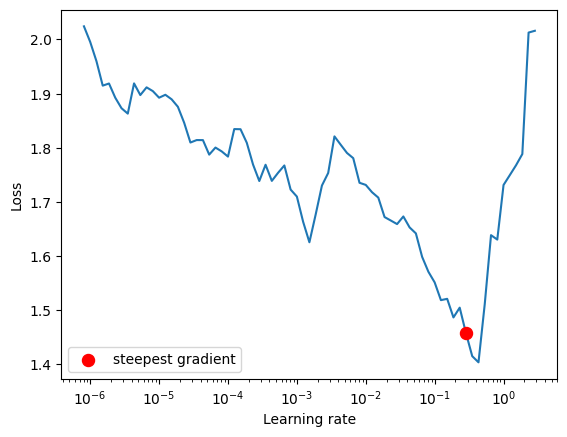

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_lr_finder import LRFinder
from torch.utils.data import DataLoader, TensorDataset

# Prepare dummy dataset and DataLoader
x_train, y_train = torch.randn(100, 10), torch.randn(100, 1)
train_loader = DataLoader(TensorDataset(x_train, y_train), batch_size=10, shuffle=True)

# Initialize model, optimizer, and criterion
model = nn.Sequential(nn.Linear(10, 1))
optimizer = optim.Adam(model.parameters(), lr=1e-7)
criterion = nn.MSELoss()

# Initialize LRFinder, run the range test, and plot the results
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=100, num_iter=100)
lr_finder.plot()  # Observe the graph to find the optimal learning rate
lr_finder.reset()  # Reset model and optimizer to initial state